In [3]:
import nb_trending
import pandas as pd
import nltk

In [18]:
import importlib
importlib.reload(nb_trending)

<module 'nb_trending' from '/n/fs/policyphylog/PrivacyPolicyPlagiarism/notebooks/nb_trending.py'>

In [2]:
#Load the data
import pickle
with open("../data/deduped_policy_text_v11.pickle", "rb") as f:
    df = pickle.load(f)

In [28]:
df_sample = df.sample(1000)

In [82]:
def score_security_bool(text):
    for sentence in nltk.tokenize.sent_tokenize(text):
        sentence = sentence.lower()
        for qualifier in ["reasonable", "appropriate", "adequate"]:
            try:
                idx = sentence.index(qualifier)
            except ValueError:
                continue
            for sec in ["security", "safeguards", "precautions", "protections"]:
                try:
                    idx2 = sentence.index(sec, idx)
                except ValueError:
                    continue
                return True
    return False
        
print(df_sample[df_sample.policy_text.apply(score_security_bool)].sample(1).policy_text.iloc[0])

Privacy Policy

Last revision: December, 2013

Enjin provides guild hosting and clan website hosting.

AU Address:

Enjin PTE LTD

16 Raffles Quay #33-03 Hong Leong Building

Singapore 048581

info@enjin.com

Enjin has been developed for all gamers, clans, guilds, and gaming communities, to organize and stay connected through the creation of gaming websites and profiles. This Privacy Policy is designed to articulate our privacy policies and how we collect and use the information you choose to share. We reserve the right to modify this policy at any time and without any notice. Please note, that by using Enjin Services you accept this policy.

Information Collection

Enjin collects information that you choose to disclose, and information while you interact with our services. For all visitors, we may collect and store information through "cookies" such as your IP and browser type. A "cookie" is a data segment or message which contains information about a user. We use session ID cookies t

In [69]:
def score_security(text):
    ct_sec = 0
    ct_sen = 0
    for sentence in nltk.tokenize.sent_tokenize(text):
        ct_sen += 1
        sentence = sentence.lower()
        break_qual = False
        for qualifier in ["reasonable", "appropriate", "adequate"]:
            try:
                idx = sentence.index(qualifier)
            except ValueError:
                continue
            for sec in ["security", "safeguards", "precautions", "protections"]:
                try:
                    idx2 = sentence.index(sec, idx)
                except ValueError:
                    continue
                ct_sec += 1
                break_qual = True
                break
            if break_qual:
                break
            
    return ct_sec
        
df_sample.policy_text.apply(score_security)

102528    2
682874    0
102368    0
530886    0
598666    0
         ..
578157    3
348465    0
72713     0
544048    1
443754    0
Name: policy_text, Length: 1000, dtype: int64

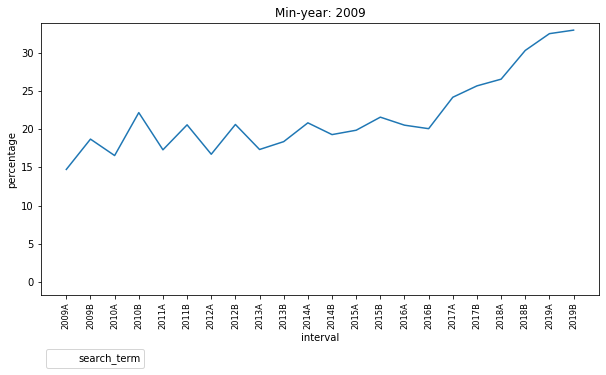

In [74]:
importlib.reload(nb_trending)
nb_trending.plot_func(df_sample_10k,score_security_bool)

In [ ]:
importlib.reload(nb_trending)
nb_trending.plot_continuous_func(df_sample_10k,score_security)

In [59]:
df_sample_10k = df.sample(10000)

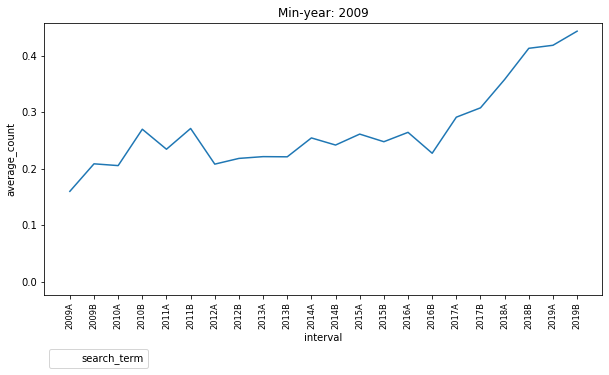

In [75]:
importlib.reload(nb_trending)
nb_trending.plot_continuous_func(df_sample_10k,score_security,nonzero=False)

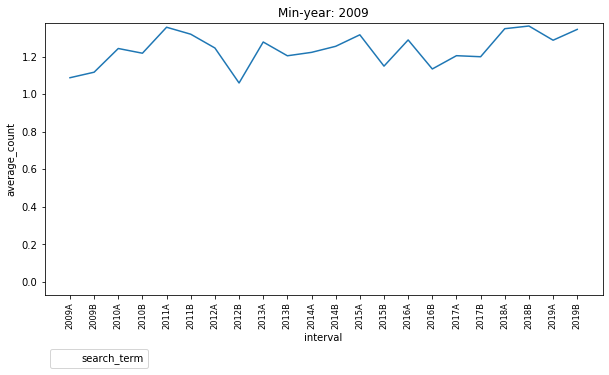

In [76]:
importlib.reload(nb_trending)
nb_trending.plot_continuous_func(df_sample_10k,score_security,nonzero=True)